Here, we explore unsupervised learning algorithms, namely k-means and principal component analysis (PCA). K-means is a popular algorithm for clustering, whereas PCA is commonly used for dimensionality reduction

**Loading modules**

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnt
import seaborn as sns

**Plotting Settings**

In [2]:
matplotlib.use('TkAgg')
%matplotlib inline 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Generate some sequential colormaps
green = sns.color_palette("YlGn_r", 7)
red_purple = sns.color_palette("RdPu_r", 7)
blue = sns.color_palette("Blues_r", 7)
or_red = sns.color_palette("YlOrRd_r", 7)

**Loading data**

In [ ]:
data = pd.read_csv("./data/jhc.solut.csv")
data.head()

,X,Y,Z,HeatRelease,ZBilger,Y_H2O,Y_H2,Y_CO2,Y_CO,Y_OH,...,T_AVG,T_RMS,Y_CH4_AVG,Y_CH4_RMS,CV_RANK,U-X,U-Y,U-Z,X_D,R_D
0,-7.700000e-34,-0.015,0,0,3.570000e-08,0.131528,1.520000e-07,3.200000e-32,-3.800000e-30,0.000041,...,0,0,0,0,2.0,4.07035,0.320967,-0.002271,0.000000,-10.0
1,1.503010e-04,-0.015,0,0,3.520000e-08,0.131527,1.500000e-07,3.880000e-32,-4.680000e-30,0.000042,...,0,0,0,0,2.0,4.07418,0.330222,-0.002959,0.100200,-10.0
2,3.006010e-04,-0.015,0,0,3.480000e-08,0.131527,1.490000e-07,4.280000e-32,-5.450000e-30,0.000042,...,0,0,0,0,2.0,4.08453,0.341255,-0.004008,0.200401,-10.0
3,4.509020e-04,-0.015,0,0,3.440000e-08,0.131527,1.470000e-07,4.500000e-32,-6.320000e-30,0.000043,...,0,0,0,0,2.0,4.10716,0.356926,-0.005325,0.300601,-10.0
4,6.012020e-04,-0.015,0,0,3.410000e-08,0.131527,1.460000e-07,4.420000e-32,-7.290000e-30,0.000044,...,0,0,0,0,2.0,4.12944,0.376804,-0.006632,0.400802,-10.0


We visualize some flowfields from the data

Text(0.5, 1.0, '$Y_{CO2}$ [-]')

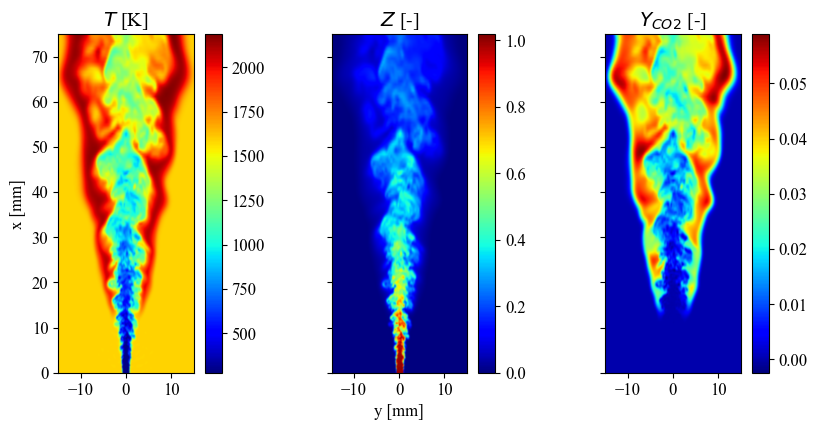

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4.4), sharey=True)
temp_plot = axs[0].imshow(np.array(data['T']).reshape(200,500).T, extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],interpolation='bicubic', cmap='jet',origin='lower')
fig.colorbar(temp_plot, ax=axs[0])
axs[0].set_title(r'$T$ [K]')
axs[0].set_ylabel('x [mm]')
axs[1].set_xlabel('y [mm]')
z_plot = axs[1].imshow(np.array(data['ZBilger']).reshape(200,500).T, extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],interpolation='bicubic', cmap='jet',origin='lower')

fig.colorbar(z_plot, ax=axs[1])
axs[1].set_title(r'$Z$ [-]')

co2_plot= axs[2].imshow(np.array(data['Y_CO2']).reshape(200,500).T, extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],interpolation='bicubic', cmap='jet',origin='lower')
fig.colorbar(co2_plot, ax=axs[2])
axs[2].set_title(r'$Y_{CO2}$ [-]')


Then we normalize the raw data as a pre-processing step

In [6]:
X = data[['ZBilger', 'Y_CH4', 'Y_CO2' ,'Y_CO', 'Y_O2', 'Y_H2O', 'T']].copy()
X_scaled = StandardScaler().fit_transform(X.values)

**K-means Clustering**

We initialize the k-means clustering algorithm for several cluster sizes.

In [7]:
km2 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km3 = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km4 = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km5 = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km6 = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

Then we apply k-means on the normalized dataset

In [8]:
y_km2 = km2.fit_predict(X_scaled)
y_km3 = km3.fit_predict(X_scaled)
y_km4 = km4.fit_predict(X_scaled)
y_km5 = km5.fit_predict(X_scaled)
y_km6 = km6.fit_predict(X_scaled)

And we visualize the results.

Text(0.5, 0, 'y [mm]')

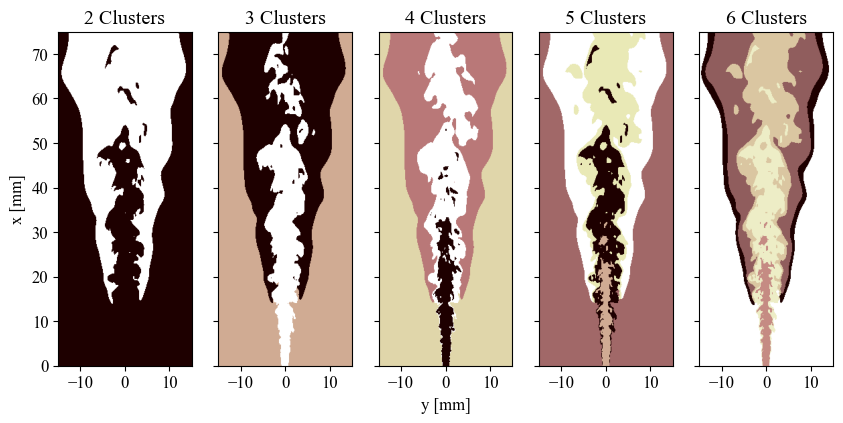

In [9]:

fig, axs = plt.subplots(1, 5, figsize=(10, 4.4), sharey=True)

axs[0].imshow(y_km2.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[0].set_title('2 Clusters')

axs[1].imshow(y_km3.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[1].set_title('3 Clusters')

axs[2].imshow(y_km4.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[2].set_title('4 Clusters')

axs[3].imshow(y_km5.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[3].set_title('5 Clusters')

axs[4].imshow(y_km6.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[4].set_title('6 Clusters')

axs[0].set_ylabel('x [mm]')
axs[2].set_xlabel('y [mm]')

K-means is able to detect several interesting flow features. Such as the reaction zone (after 5 clusters) and the non-reacting region (after 3 clusters)